<a href="https://colab.research.google.com/github/iamjesse98/super-conductivity/blob/master/MLR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from pydoc import help  # can type in the python console `help(name of function)` to get the documentation
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns, sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from scipy import stats,special
from sklearn import preprocessing
import pylab
import warnings
warnings.filterwarnings('ignore')  # don't print out warnings

# figures inline in notebook
%matplotlib inline


In [8]:
dataset = pd.read_csv('https://raw.githubusercontent.com/iamjesse98/super-conductivity/master/train.csv')

X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
"""
mean = [np.mean(X[:,i]) for i in range(X.shape[1])]
plt.scatter(np.arange(X.shape[1]),mean)
plt.xlabel("Feature index")
plt.ylabel("Mean of the features")
plt.title("MEAN PLOT")

plt.figure()


variance = [np.var(X[:,i]) for i in range(X.shape[1])]
plt.scatter(np.arange(X.shape[1]),variance)
plt.xlabel("Feature index")
plt.ylabel("Variance of the features")
plt.title("VARIANCE PLOT")

plt.figure()
import scipy

mc = scipy.corrcoef(X,rowvar=0)
f, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(mc, ax=ax, cmap="YlGnBu", linewidths=0.1)
"""
#[variance_inflation_factor(check, i) for i in range(check.shape[1])]
#X = dataset.loc[:, "number_of_elements":"wtd_std_Valence"]#.values
#y = dataset.loc[:, "critical_temp"]#.values

#X = np.append(arr = np.ones((X.shape[0], 1)).astype(int), values = X, axis = 1)

'\nmean = [np.mean(X[:,i]) for i in range(X.shape[1])]\nplt.scatter(np.arange(X.shape[1]),mean)\nplt.xlabel("Feature index")\nplt.ylabel("Mean of the features")\nplt.title("MEAN PLOT")\n\nplt.figure()\n\n\nvariance = [np.var(X[:,i]) for i in range(X.shape[1])]\nplt.scatter(np.arange(X.shape[1]),variance)\nplt.xlabel("Feature index")\nplt.ylabel("Variance of the features")\nplt.title("VARIANCE PLOT")\n\nplt.figure()\nimport scipy\n\nmc = scipy.corrcoef(X,rowvar=0)\nf, ax = plt.subplots(figsize=(8, 6))\nsns.heatmap(mc, ax=ax, cmap="YlGnBu", linewidths=0.1)\n'

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)
import statsmodels.api as sm

regressor_OLS1 = sm.OLS(y_train, X_train).fit()
regressor_OLS1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.869
Model:                            OLS   Adj. R-squared (uncentered):              0.868
Method:                 Least Squares   F-statistic:                              1558.
Date:                Tue, 26 Nov 2019   Prob (F-statistic):                        0.00
Time:                        16:02:01   Log-Likelihood:                         -82005.
No. Observations:               19136   AIC:                                  1.642e+05
Df Residuals:                   19055   BIC:                                  1.648e+05
Df Model:                          81                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -3.3741      0.792     -4.259      0.000      -4.927      -1.821
x2             0.8639      0.088      9.856      0.000       0.692       1.036
x3            -0.9687      0.109     -8.890      0.000      -1.182      -0.755
x4            -0.5306      0.087     -6.106      0.000      -0.701      -0.360
x5             0.7000      0.103      6.769      0.000       0.497       0.903
x6           -32.7164      4.818     -6.791      0.000     -42.159     -23.273
x7             2.5466      3.848      0.662      0.508      -4.995      10.088
x8             0.2124      0.017     12.187      0.000       0.178       0.247
x9             0.0283      0.023      1.225      0.221      -0.017       0.074
x10           -0.5540      0.066     -8.357      0.000      -0.684      -0.424
x11            0.0934      0.058      1.623      0.105      -0.019       0.206
x12            0.1732      0.066      2.611      0.009       0.043       0.303
x13           -0.2339      0.080     -2.920      0.004      -0.391      -0.077
x14           -0.1768      0.065     -2.712      0.007      -0.305      -0.049
x15            0.2503      0.079      3.158      0.002       0.095       0.406
x16         -117.9063     21.266     -5.544      0.000    -159.590     -76.222
x17           43.1378      5.039      8.560      0.000      33.260      53.015
x18            0.0707      0.007     10.459      0.000       0.057       0.084
x19            0.0205      0.004      5.354      0.000       0.013       0.028
x20           -0.2144      0.023     -9.224      0.000      -0.260      -0.169
x21           -0.0108      0.021     -0.507      0.612      -0.052       0.031
x22           -0.5739      0.191     -3.010      0.003      -0.948      -0.200
x23            3.3866      0.255     13.257      0.000       2.886       3.887
x24            0.1986      0.191      1.040      0.298      -0.176       0.573
x25           -3.0101      0.250    -12.050      0.000      -3.500      -2.520
x26           75.4843     18.415      4.099      0.000      39.389     111.579
x27           47.8292      5.607      8.530      0.000      36.838      58.820
x28            0.1812      0.023      7.774      0.000       0.136       0.227
x29           -0.0842      0.017     -5.038      0.000      -0.117      -0.051
x30           -0.3037      0.104     -2.932      0.003      -0.507      -0.101
x31           -0.3606      0.093     -3.874      0.000      -0.543      -0.178
x32           -0.0046      0.001     -8.782      0.000      -0.006      -0.004
x33         1.367e-05      0.001      0.021      0.983      -0.001       0.001
x34            0.0013      0.000      2.595      0.009       0.000       0.002
x35            0.0022      0.001      3.628      0.000       

In [11]:
def backwardelimination(x, y, sl):
    numVars = len(x[0])
    for i in range(0,numVars):
        regressor_OLS2 = sm.OLS(y, x).fit()
        maxVar = max(regressor_OLS2.pvalues).astype(float)
        if maxVar > sl:
            for j in range(0,numVars - i):
                if(regressor_OLS2.pvalues[j].astype(float) == maxVar):
                    x = np.delete(x, j, 1)
                    break
        else:
            break
    #print(regressor_OLS.summary())
    return x

SL = 0.05
X_modified = backwardelimination(X, y, SL)


X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_modified, y, test_size = 0.1, random_state = 0)

regressor_OLS_BE = sm.OLS(y_train_1, X_train_1).fit()
regressor_OLS_BE.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.869
Model:                            OLS   Adj. R-squared (uncentered):              0.868
Method:                 Least Squares   F-statistic:                              1802.
Date:                Tue, 26 Nov 2019   Prob (F-statistic):                        0.00
Time:                        16:02:16   Log-Likelihood:                         -82010.
No. Observations:               19136   AIC:                                  1.642e+05
Df Residuals:                   19066   BIC:                                  1.647e+05
Df Model:                          70                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -3.6509      0.767     -4.757      0.000      -5.155      -2.147
x2             0.7851      0.064     12.283      0.000       0.660       0.910
x3            -0.8210      0.055    -14.904      0.000      -0.929      -0.713
x4            -0.4644      0.068     -6.836      0.000      -0.598      -0.331
x5             0.5782      0.059      9.754      0.000       0.462       0.694
x6           -29.9794      4.287     -6.993      0.000     -38.382     -21.577
x7             0.2090      0.017     12.070      0.000       0.175       0.243
x8            -0.4677      0.047    -10.048      0.000      -0.559      -0.376
x9             0.1828      0.046      3.965      0.000       0.092       0.273
x10           -0.2465      0.038     -6.478      0.000      -0.321      -0.172
x11           -0.1871      0.045     -4.126      0.000      -0.276      -0.098
x12            0.2637      0.038      6.902      0.000       0.189       0.339
x13         -108.8089     19.535     -5.570      0.000    -147.100     -70.518
x14           39.8542      4.512      8.833      0.000      31.010      48.698
x15            0.0709      0.007     10.556      0.000       0.058       0.084
x16            0.0189      0.003      5.713      0.000       0.012       0.025
x17           -0.2219      0.017    -13.009      0.000      -0.255      -0.188
x18           -0.3744      0.028    -13.388      0.000      -0.429      -0.320
x19            3.1376      0.163     19.293      0.000       2.819       3.456
x20           -2.7622      0.153    -18.036      0.000      -3.062      -2.462
x21           70.1096     17.429      4.022      0.000      35.946     104.273
x22           48.0539      4.135     11.622      0.000      39.949      56.158
x23            0.1867      0.023      8.162      0.000       0.142       0.232
x24           -0.0853      0.013     -6.622      0.000      -0.110      -0.060
x25           -0.3815      0.074     -5.136      0.000      -0.527      -0.236
x26           -0.2901      0.066     -4.424      0.000      -0.419      -0.162
x27           -0.0047      0.000    -12.866      0.000      -0.005      -0.004
x28            0.0013      0.000      3.609      0.000       0.001       0.002
x29            0.0022      0.000      8.151      0.000       0.002       0.003
x30           12.8397      3.416      3.759      0.000       6.144      19.535
x31          -17.2150      2.179     -7.902      0.000     -21.485     -12.945
x32           -0.0016      0.000     -7.223      0.000      -0.002      -0.001
x33            0.0061      0.001      8.888      0.000       0.005       0.007
x34           -0.0014      0.000     -3.383      0.001      -0.002      -0.001
x35           -0.0769      0.048     -1.613      0.107      -

In [12]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

regressor1 = LinearRegression()
regressor1.fit(X_train_1, y_train_1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

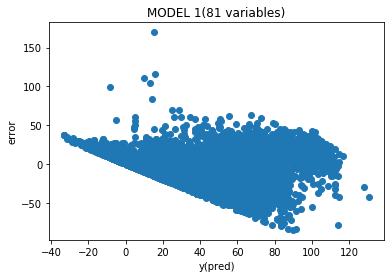

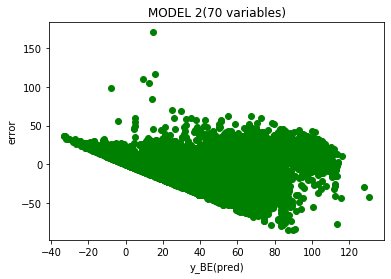

In [13]:
y_train_pred = regressor.predict(X_train)

e = (y_train - y_train_pred)
plt.xlabel('y(pred)')
plt.ylabel('error')
plt.title("MODEL 1(81 variables)")
plt.scatter(y_train_pred, e)

plt.figure()

############################################################################

y_train_pred_1 = regressor1.predict(X_train_1)

e_1 = y_train_1 - y_train_pred_1
plt.xlabel('y_BE(pred)')
plt.ylabel('error')
plt.title("MODEL 2(70 variables)")
plt.scatter(y_train_pred_1, e_1, color='g')

In [14]:
from statsmodels.stats.stattools import durbin_watson as dw

DW = dw(e)
DW_BE = dw(e_1)
print("DW(Model 1) = %f nearly 2 => residuals(errors) are uncorrelated"%(DW))
print("DW(Model 2) = %f nearly 2 => residuals(errors) are uncorrelated"%(DW_BE))

DW(Model 1) = 1.982261 nearly 2 => residuals(errors) are uncorrelated
DW(Model 2) = 1.982182 nearly 2 => residuals(errors) are uncorrelated


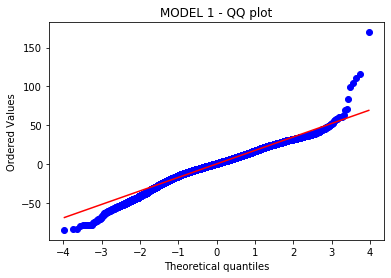

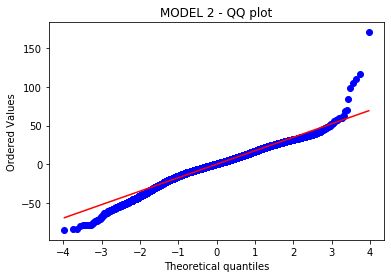

In [15]:
stats.probplot(e, dist="norm", plot=pylab)
pylab.title("MODEL 1 - QQ plot")
pylab.show()

pylab.figure()

stats.probplot(e_1, dist="norm", plot=pylab)
pylab.title("MODEL 2 - QQ plot")
pylab.show()

In [16]:
boxcox_y, lmbda, CI = stats.boxcox(y, alpha=0.05)
print("To overcome heteroscadacity we used boxcox method to transform y's. And the best lambda is %f"%(lmbda))

X_train1_box, X_test1_box, y_train1_box, y_test1_box = train_test_split(X_modified, boxcox_y, test_size = 0.1, random_state = 0)

X_train_box, X_test_box, y_train_box, y_test_box = train_test_split(X, boxcox_y, test_size = 0.1, random_state = 0)

To overcome heteroscadacity we used boxcox method to transform y's. And the best lambda is 0.242333


                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.934
Model:                            OLS   Adj. R-squared (uncentered):              0.933
Method:                 Least Squares   F-statistic:                              3306.
Date:                Tue, 26 Nov 2019   Prob (F-statistic):                        0.00
Time:                        16:03:33   Log-Likelihood:                         -32885.
No. Observations:               19136   AIC:                                  6.593e+04
Df Residuals:                   19055   BIC:                                  6.657e+04
Df Model:                          81                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

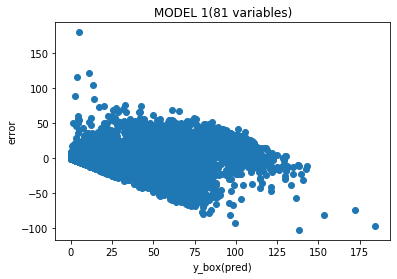

In [17]:
regressor_box = LinearRegression()
regressor_box.fit(X_train_box, y_train_box)

trans_y_train_box = special.inv_boxcox(y_train_box, lmbda)
trans_y_test_box = special.inv_boxcox(y_test_box, lmbda)

y_train_box_pred = special.inv_boxcox(regressor_box.predict(X_train_box), lmbda)

e = trans_y_train_box - y_train_box_pred
plt.xlabel('y_box(pred)')
plt.ylabel('error')
plt.title("MODEL 1(81 variables)")
plt.scatter(y_train_box_pred, e)

regressor_OLS_box = sm.OLS(y_train_box, X_train_box).fit()
print(regressor_OLS_box.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.933
Model:                            OLS   Adj. R-squared (uncentered):              0.932
Method:                 Least Squares   F-statistic:                              3771.
Date:                Tue, 26 Nov 2019   Prob (F-statistic):                        0.00
Time:                        16:03:40   Log-Likelihood:                         -33018.
No. Observations:               19136   AIC:                                  6.618e+04
Df Residuals:                   19066   BIC:                                  6.673e+04
Df Model:                          70                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

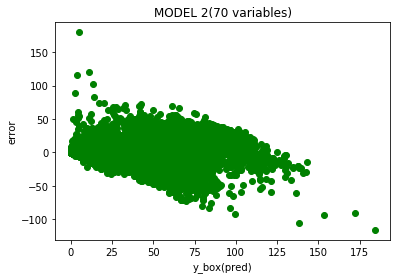

In [18]:
regressor_box_1 = LinearRegression()
regressor_box_1.fit(X_train1_box, y_train1_box)

trans_y_train_box_1 = special.inv_boxcox(y_train1_box, lmbda)
trans_y_test_box_1 = special.inv_boxcox(y_test1_box, lmbda)

y_train_box_pred_1 = special.inv_boxcox(regressor_box_1.predict(X_train1_box), lmbda)

e = trans_y_train_box_1 - y_train_box_pred_1
plt.xlabel('y_box(pred)')
plt.ylabel('error')
plt.title("MODEL 2(70 variables)")
plt.scatter(y_train_box_pred, e,color = 'g')

regressor_OLS_box_1 = sm.OLS(y_train1_box, X_train1_box).fit()
print(regressor_OLS_box_1.summary())

<StemContainer object of 3 artists>

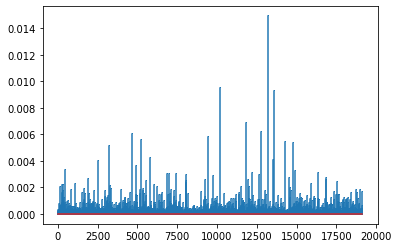

In [20]:
influence = regressor_OLS_box.get_influence()

(c, p) = influence.cooks_distance
plt.stem(np.arange(len(c)), c, markerfmt=",")

#con = c > 0.008
#print(np.extract(con, np.array(range(X_train_box.shape[0]))))
#print("Influenecial point is " + np.extract(con, np.array(range(X_train_box.shape[0]))))

In [0]:
"""from statsmodels.stats.outliers_influence import variance_inflation_factor

check = X_modified
VIF = [variance_inflation_factor(check, i) for i in range(check.shape[1])]
print(VIF)"""

[687.49265374931531, 2144.8318848774029, 1193.2228178885189, 1707.1612865919774, 1022.5111574234336, 1681.6911007392214, 302.60553403905527, 317.38224144616657, 78548.815097787272, 69050.098599581688, 69776.602123744728, 63326.79122038059, 43125.199276022395, 1221.0447545917255, 1173.9280692156042, 190.41312295973916, 1051.3269255959708, 1221.2708640000258, 30936.13869775031, 23016.050595310702, 32882.505965856886, 1515.6848179389769, 776.10669425676952, 39.404329154658612, 1089.5852566039061, 894.97107178142835, 375.56844482289858, 219.00909120610439, 118.0306898704888, 906.47697130177414, 244.18680038444288, 284.01513228106114, 417.77229099833778, 136.17034409716055, 929.81800503443549, 1594.3805327338248, 350.26252071252338, 768.18179104267153, 151.59296737162575, 330.75180526870975, 93.823415885302452, 547.00711877463687, 219.08013616612732, 785.61283228161585, 936.50476035827796, 411.91783090286214, 572.35559323974019, 649.79081669435186, 229.94701924240189, 251.63885013499041, 55

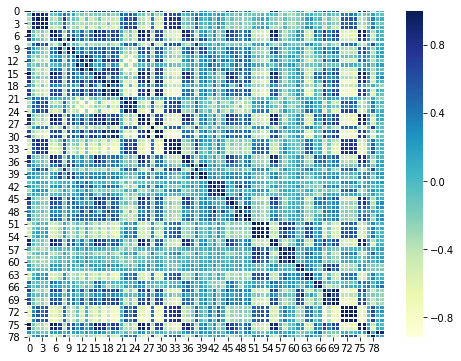

In [21]:
import scipy

mc = scipy.corrcoef(X_train_box,rowvar=0)
f, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(mc, ax=ax, cmap="YlGnBu", linewidths=0.1)

In [22]:
################## PCA
import scipy.stats as ss
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

A = np.array( list(X_modified[:, i] for i in range(X_modified.shape[1])))
A1 = A.tolist() 

[t, p] = ss.bartlett(*A1)
print("%f < 0.05 => we can apply PCA"%p)

0.000000 < 0.05 => we can apply PCA


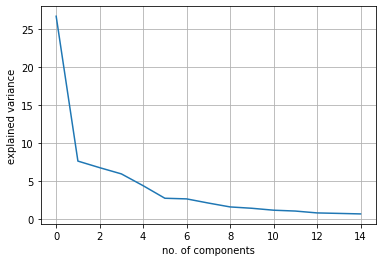

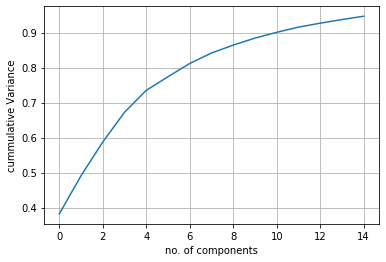

Eigen values(PCA Variances)


array([26.73738004,  7.62808763,  6.76210426,  5.93960484,  4.38387579,
        2.72645032,  2.64272855,  2.09503831,  1.5827187 ,  1.40431963,
        1.15010989,  1.03872408,  0.79177223,  0.72785783,  0.66027441])

In [23]:
sc = StandardScaler()
X_std = sc.fit_transform(X_modified)

pca = PCA(n_components = 15)
X_PCA = pca.fit_transform(X_std)

explained_variance = pca.explained_variance_
var=pca.explained_variance_ratio_.cumsum()

plt.plot(explained_variance)
plt.xlabel("no. of components")
plt.ylabel("explained variance")
plt.grid(True)
plt.show()

plt.plot(var)
plt.xlabel("no. of components")
plt.ylabel("cummulative Variance")
plt.grid(True)
plt.show()

print("Eigen values(PCA Variances)")
explained_variance

In [24]:
X_train_PCA, X_test_PCA, y_train_PCA, y_test_PCA = train_test_split(X_PCA, boxcox_y, test_size = 0.1, random_state = 0)

#regressor_PCA = LinearRegression()
#regressor_PCA.fit(X_train_PCA, y_train_PCA)

regressor_OLS_PCA = sm.OLS(y_train_PCA, X_train_PCA).fit()
regressor_OLS_PCA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.196
Model:                            OLS   Adj. R-squared (uncentered):              0.195
Method:                 Least Squares   F-statistic:                              310.2
Date:                Tue, 26 Nov 2019   Prob (F-statistic):                        0.00
Time:                        16:13:19   Log-Likelihood:                         -56746.
No. Observations:               19136   AIC:                                  1.135e+05
Df Residuals:                   19121   BIC:                                  1.136e+05
Df Model:                          15                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.3985      0.007    -60.735      0.000      -0.411      -0.386
x2            -0.1509      0.012    -12.250      0.000      -0.175      -0.127
x3             0.1662      0.013     12.724      0.000       0.141       0.192
x4            -0.1930      0.014    -13.913      0.000      -0.220      -0.166
x5             0.0996      0.016      6.113      0.000       0.068       0.132
x6             0.1387      0.021      6.733      0.000       0.098       0.179
x7             0.0657      0.021      3.152      0.002       0.025       0.107
x8            -0.2236      0.024     -9.495      0.000      -0.270      -0.177
x9            -0.1631      0.027     -6.027      0.000      -0.216      -0.110
x10           -0.1031      0.029     -3.605      0.000      -0.159      -0.047
x11           -0.0479      0.031     -1.524      0.128      -0.110       0.014
x12           -0.1852      0.033     -5.551      0.000      -0.251      -0.120
x13            0.3337      0.038      8.717      0.000       0.259       0.409
x14           -0.2647      0.040     -6.618      0.000      -0.343      -0.186
x15            0.3645      0.042      8.721      0.000       0.283       0.446
==============================================================================
Omnibus:                     1165.293   Durbin-Watson:                   0.230
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1565.163
Skew:                          -0.560   Prob(JB):                         0.00
Kurtosis:                       3.841   Cond. No.                         6.37
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""